In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import isfile, join
import os
from PIL import Image 
from itertools import groupby
'''
Copyright Mustafa Keskin 16501035
'''

'\nCopyright Mustafa Keskin 16501035\n'

In [2]:
def conversion(path):
    
    col = Image.open(path)
    filePath = path
    fileName = path.replace(' ', '')[:-4]

    # converting to grayscale
    gray_scale = col.convert("L")
    gray_scale.save(fileName + '_gray.bmp')
    # on a seperate object converting and saving 16 color grayscale
    gray_scale4 = gray_scale.point(lambda x: int(x / 17) * 17)
    gray_scale4.save(fileName + '_gray4.bmp')
    gray_read = cv2.imread(fileName + '_gray4.bmp', cv2.IMREAD_GRAYSCALE)

    # conversion and saving of BW image
    im_grayscale = cv2.imread(filePath,0)
    (thresh, im_bw) = cv2.threshold(im_grayscale, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite(fileName + '_bw.bmp',im_bw)
    bw_read = cv2.split(im_bw)

    color_space = cv2.imread(filePath)
    b, g, r = cv2.split(color_space)


In [3]:
os.chdir("C:\\Users\\Mustafa\\testresim")
print os.getcwd()
dir = "C:\\Users\\Mustafa\\testresim"
paths = os.listdir(dir)

for path in paths:
    if(path.find("_") != -1):
        print path
        os.remove(path)
    else:
        print "here  " + path



C:\Users\Mustafa\testresim
here  barbara.bmp
barbara_bw.bmp
barbara_gray.bmp
barbara_gray4.bmp
here  biber.bmp
biber_bw.bmp
biber_gray.bmp
biber_gray4.bmp
here  boat.bmp
here  boats.bmp
boats_bw.bmp
boats_gray.bmp
boats_gray4.bmp
boat_bw.bmp
boat_gray.bmp
boat_gray4.bmp
here  ev.bmp
ev_bw.bmp
ev_gray.bmp
ev_gray4.bmp
here  goldhill.bmp
goldhill_bw.bmp
goldhill_gray.bmp
goldhill_gray4.bmp
here  lenna.bmp
lenna_bw.bmp
lenna_gray.bmp
lenna_gray4.bmp
here  magnify.bmp
magnify_bw.bmp
magnify_gray.bmp
magnify_gray4.bmp
here  masuda1.bmp
masuda1_bw.bmp
masuda1_gray.bmp
masuda1_gray4.bmp
here  plast.bmp
plast_bw.bmp
plast_gray.bmp
plast_gray4.bmp
here  tiffany.bmp
here  ucak.bmp
here  zelda.bmp


In [4]:
paths = os.listdir(dir)
for path in paths:
    conversion(path)

C:\Users\Mustafa\testresim\barbara.bmp
C:\Users\Mustafa\testresim\barbara_bw.bmp
C:\Users\Mustafa\testresim\barbara_gray.bmp
C:\Users\Mustafa\testresim\barbara_gray4.bmp
C:\Users\Mustafa\testresim\biber.bmp
C:\Users\Mustafa\testresim\biber_bw.bmp
C:\Users\Mustafa\testresim\biber_gray.bmp
C:\Users\Mustafa\testresim\biber_gray4.bmp
C:\Users\Mustafa\testresim\boat.bmp
C:\Users\Mustafa\testresim\boats.bmp
C:\Users\Mustafa\testresim\boats_bw.bmp
C:\Users\Mustafa\testresim\boats_gray.bmp
C:\Users\Mustafa\testresim\boats_gray4.bmp
C:\Users\Mustafa\testresim\boat_bw.bmp
C:\Users\Mustafa\testresim\boat_gray.bmp
C:\Users\Mustafa\testresim\boat_gray4.bmp
C:\Users\Mustafa\testresim\ev.bmp
C:\Users\Mustafa\testresim\ev_bw.bmp
C:\Users\Mustafa\testresim\ev_gray.bmp
C:\Users\Mustafa\testresim\ev_gray4.bmp
C:\Users\Mustafa\testresim\goldhill.bmp
C:\Users\Mustafa\testresim\goldhill_bw.bmp
C:\Users\Mustafa\testresim\goldhill_gray.bmp
C:\Users\Mustafa\testresim\goldhill_gray4.bmp
C:\Users\Mustafa\testres

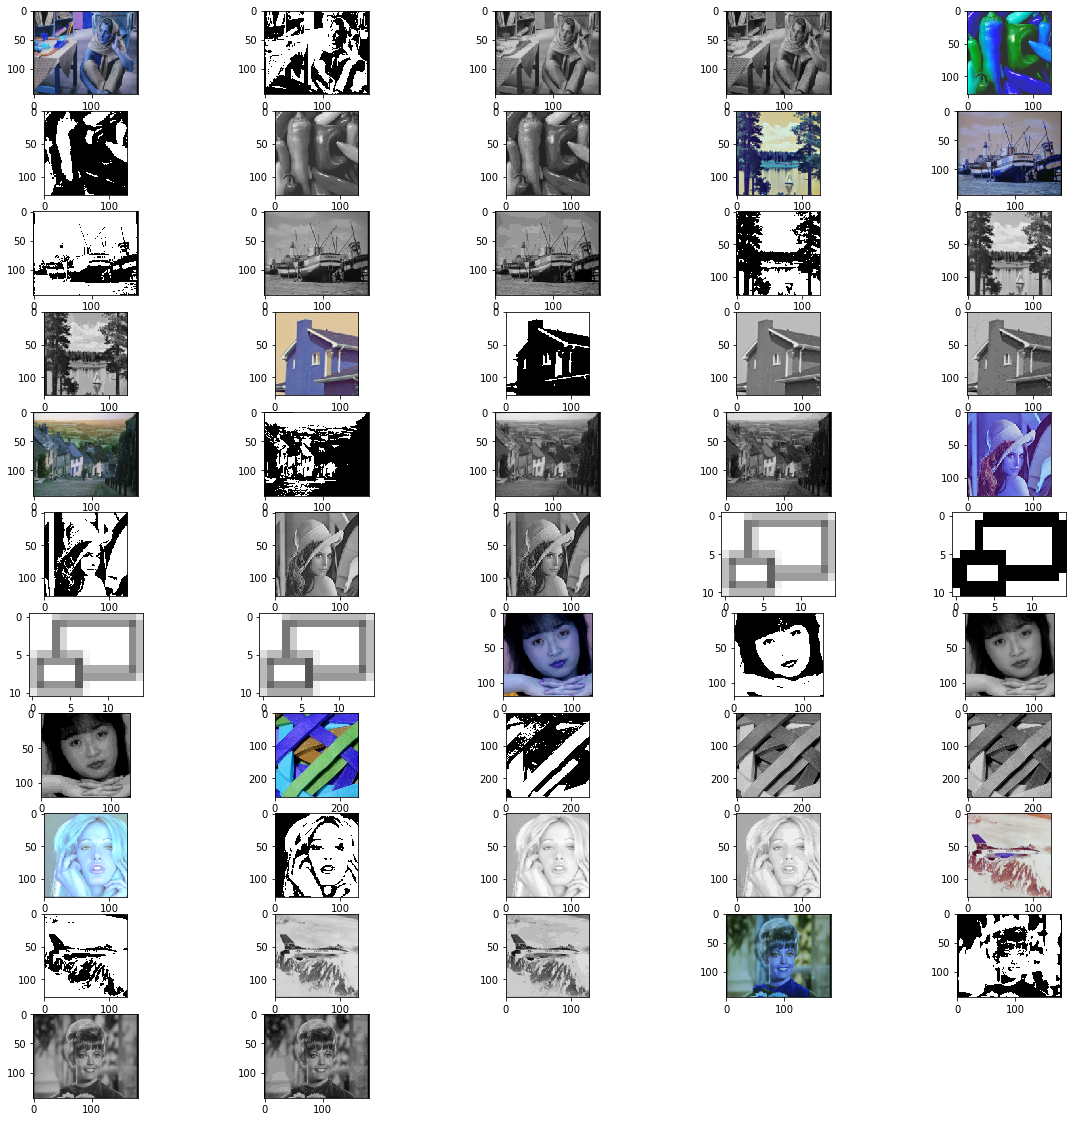

In [5]:
images = []
dir = "C:\\Users\\Mustafa\\testresim"
paths = os.listdir(dir)


for path in paths:
    full_path = join(dir, path)
    image = cv2.imread(full_path)
    images.append(image)
    print full_path

plt.figure(figsize =(20,20))
columns = 5

for i,image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Satır satır gezme

In [6]:
def row2row(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(rows):
        if i % 2 == 0:
            for j in range(cols):
                vektor.append(I[i,j])
        else:
            for j in range(cols - 1, -1 , -1):
                vektor.append(I[i,j])
    return vektor

In [7]:
def row3row(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(rows):
        if i % 2 == 0:
            for j in range(cols):
                vektor.append(i * rows + j)
        else:
            for j in range(cols - 1, -1 , -1):
                vektor.append(i * rows + j)
    return vektor

I2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result = row3row(I2)
I3 = I2.ravel()
print I2
print I3
print I3[result]
print result

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 2 3 6 5 4 7 8 9]
[0L, 1L, 2L, 5L, 4L, 3L, 6L, 7L, 8L]


# Sütun sütun gezme

In [8]:
def col2col(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(cols):
        if i % 2 == 0:
            for j in range(rows):
                vektor.append(I[j,i])
        else:
            for j in range(rows - 1, -1 , -1):
                vektor.append(I[j,i])

    return(vektor)            

In [9]:
def col3col(I):
    vektor = []
    rows, cols = I.shape
    # matrix2vector
    for i in range(cols):
        if i % 2 == 0:
            for j in range(rows):
                vektor.append(j * rows + i)
        else:
            for j in range(rows - 1, -1 , -1):
                vektor.append(j * rows + i)

    return(vektor)        

I2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result = col3col(I2)
I3 = I2.ravel()
print I2
print I3
print I3[result]
print result

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 4 7 8 5 2 3 6 9]
[0L, 3L, 6L, 7L, 4L, 1L, 2L, 5L, 8L]


# Zigzag Gezme
(start at 0, 0)
1. move right once
2. move to the bottom left
3. move down once
4. move to the top right. 

For the lower triangle of the matrix,

1. move right once
2. move to the top right
3. move down once
4. move to the bottom left. 

a11 a12 a13 a14 <br>
a21 a22 a23 a24 <br>
a31 a32 a33 a34 <br>
a41 a42 a43 a44 <br>

Output:
a11 a12 a21 a31 a22 a13 a14 a23 a32 a41 a42 a33 a24 a34 a43 a44.

In [10]:
def zig2zag(I):
    rows, cols = I.shape
    vektor = []
    # matrix2vector

    siz = rows
    for z in range(siz):
        x = 0
        y = z
        while(x <= z and y >=0):
            if(z % 2 == 0):
                vektor.append(I[y, x])
                y = y - 1
                x = x + 1
            else:
                vektor.append(I[x, y])
                x = x + 1
                y = y - 1


    for z in range(1,siz):
        x = z
        y = siz - 1
        while(x < siz and y >= z):
            if((siz + z) % 2 == 0):
                vektor.append(I[x, y])
                x = x + 1
                y = y - 1
            else:
                vektor.append(I[y, x])
                y = y - 1
                x = x + 1

    return vektor

In [11]:
def zig3zag(I):
    rows, cols = I.shape
    vektor = []
    # matrix2vector

    siz = rows
    for z in range(siz):
        x = 0
        y = z
        while(x <= z and y >=0):
            if(z % 2 == 0):
                vektor.append(y * rows + x)
                y = y - 1
                x = x + 1
            else:
                vektor.append(x * rows + y)
                x = x + 1
                y = y - 1


    for z in range(1,siz):
        x = z
        y = siz - 1
        while(x < siz and y >= z):
            if((siz + z) % 2 == 0):
                vektor.append(x * rows + y)
                x = x + 1
                y = y - 1
            else:
                vektor.append(y * rows + x)
                y = y - 1
                x = x + 1

    return vektor


I2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
result = zig3zag(I2)
I3 = I2.ravel()
print I2
print I3
print I3[result]
print result

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[1 2 4 7 5 3 6 8 9]
[0L, 1L, 3L, 6L, 4L, 2L, 5L, 7L, 8L]


# Example of RLE

In [12]:
def encode(vektor):
    return [(sum(1 for _ in g), k) for k,g in groupby(vektor)]

In [40]:
I = images[6]
I = I[:,:,0]
print(I.shape)
satir = row2row(I)
satir3 = row3row(I)

sutun = col2col(I)
sutun3 = col3col(I)

zigzag = zig2zag(I)
zigzag3 = zig3zag(I)


encode_satir = encode(satir)
encode_sutun =  encode(sutun)
encode_zigzag =  encode(zigzag)

(128L, 128L)


In [33]:
filename = "satir.txt"
np.savetxt(filename, encode_satir, fmt='%d',newline='\n')
compressed = np.loadtxt(filename)

In [51]:
rows, cols = compressed.shape
sonuc = []
for i in range(rows):
    value = int(compressed[i,0])
    for j in range(value):
        sonuc.append(int(compressed[i,1]))

In [53]:
sonuc2 = np.array(sonuc)
satir33 = sonuc2[satir3]
sutun33 = sonuc2[sutun3]
zigzag33 = sonuc2[zigzag3]

In [58]:
satir333 =  np.reshape(satir33, (128,-1)) 

In [59]:
print I[:3, :3]
print satir333[:3, :3]

[[ 42  93 173]
 [ 45 114 167]
 [ 49  66 146]]
[[ 42  93 173]
 [ 45 114 167]
 [ 49  66 146]]
